## Multi Variable Linear Regression

### 0. Common Libs

In [1]:
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline


def warm_up_exercise():
    print('warm_up_exercise')
    return np.eye(5)


def compute_cost(X, y, theta):
    m = y.size
    J = (np.sum(np.square(X.dot(theta) - y))) / (2 * m)

    return J


def gradient_descent(X, y, theta, alpha, iterations):
    m = y.size
    J_history = np.zeros(iterations)

    for i in range(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        J_history[i] = compute_cost(X, y, theta)

    return (theta, J_history)


def feature_normalize(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_norm = np.divide((x - mean), std)
    
    return (x_norm, mean, std)


def plot_convergence(jvec):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(jvec)), jvec, 'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05 * iterations, 1.05 * iterations])


def norm_equation(X, y):
    # octave equation: 
    # theta = pinv(X'*X)*X'*y;
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)


def h(theta, X):
    return np.sum(np.dot(X, theta))


### 1. Load data

In [2]:
origin_data = np.array(np.loadtxt("ex1data2.txt", dtype='float64', delimiter=','))

### 2. Feature Normalize

In [3]:
# Feature normalize
data_norm, mean, std = feature_normalize(origin_data)

x = data_norm[:, :-1]
y = data_norm[:, -1:]

ones = np.transpose([np.ones(x.shape[0])])
X = np.hstack((ones, x))


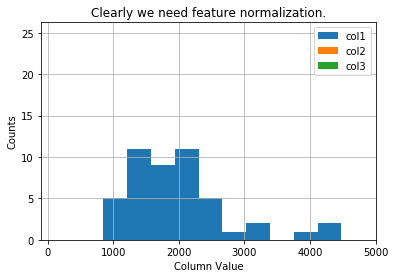

In [4]:
plt.grid(True)
plt.xlim([-100, 5000])
dummy = plt.hist(origin_data[:, 0], label='col1')
dummy = plt.hist(origin_data[:, 1], label='col2')
dummy = plt.hist(origin_data[:, 2], label='col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()


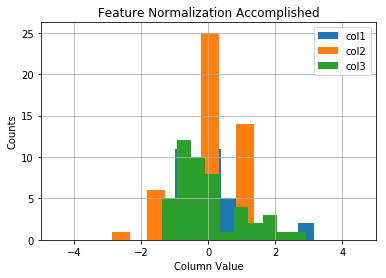

In [5]:
plt.grid(True)
plt.xlim([-5, 5])
dummy = plt.hist(data_norm[:, 0], label='col1')
dummy = plt.hist(data_norm[:, 1], label='col2')
dummy = plt.hist(data_norm[:, 2], label='col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()


### 3. Gradient Descent

In [6]:
theta = np.random.randn(3).reshape((3,1))


iterations = 1400
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
price = h(theta, [1, 1650, 3])
print('Price predict: ', price * std[-1] + mean[-1], 'Expect: $293081.46')


Price predict:  180371551.203 Expect: $293081.46


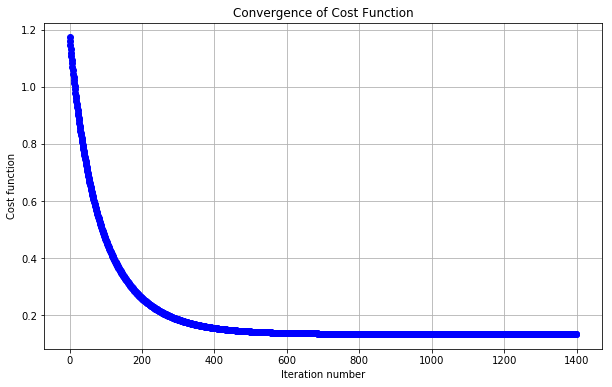

In [7]:
plot_convergence(J_history)

### 4. Normal Equation

In [8]:
x = origin_data[:, :-1]
y = origin_data[:, -1:]

ones = np.transpose([np.ones(x.shape[0])])
X = np.hstack((ones, x))

theta = norm_equation(X, y)
print('Price predict: ', h(theta, [1, 1650, 3]), 'Expect: $293081.46')


Price predict:  293081.464335 Expect: $293081.46
